# Rete Neurale Semplice con PyTorch

**Dataset**: Iris (classificazione di fiori)  
**Obiettivo**: Classificare 3 specie di fiori basandosi su 4 features

## 1. Import delle Librerie

In [10]:
# Import delle librerie essenziali
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Configurazione
torch.manual_seed(42)
np.random.seed(42)
plt.style.use('default')

print("📦 Librerie caricate con successo!")
print(f"🔥 PyTorch: {torch.__version__}")

# Device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"⚙️ Device: {device}")

📦 Librerie caricate con successo!
🔥 PyTorch: 2.10.0+cpu
⚙️ Device: cpu


## 2. Caricamento e Esplorazione Dataset

In [11]:
# Carica il dataset Iris
iris = load_iris()
X = iris.data
y = iris.target

print("🌸 Dataset Iris caricato!")
print(f"📊 Shape: {X.shape} (150 campioni, 4 features)")
print(f"🎯 Classi: {len(iris.target_names)} → {iris.target_names}")
print(f"📝 Features: {iris.feature_names}")

# Statistiche di base
df = pd.DataFrame(X, columns=iris.feature_names)
df['target'] = y

print("\n📈 Prime 5 righe:")
print(df.head())

print("\n📊 Distribuzione classi:")
print(df['target'].value_counts().sort_index())

# Visualizzazione rapida
# fig, ax = plt.subplots(figsize=(6, 4))

# # Distribuzione delle classi
# ax.bar(iris.target_names, [np.sum(y == i) for i in range(3)],
#         color=['red', 'green', 'blue'], alpha=0.7)
# ax.set_title('Distribuzione Classi')
# ax.set_ylabel('Numero campioni')

# plt.tight_layout()
# plt.show()

🌸 Dataset Iris caricato!
📊 Shape: (150, 4) (150 campioni, 4 features)
🎯 Classi: 3 → ['setosa' 'versicolor' 'virginica']
📝 Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

📈 Prime 5 righe:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  

📊 Distribuzione classi:
target
0    50
1    50
2    50
Name: count, dtype: int64


## 3. Divisione Dataset: Train/Validation/Test

**Importante**: Divisione corretta per evitare data leakage!

In [12]:
# STEP 1: Separa test set (20%)
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# STEP 2: Separa train (60%) e validation (20%) dal rimanente 80%
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=0.25, random_state=42, stratify=y_train_val  # 0.25 * 0.8 = 0.2
)

print("📊 DIVISIONE DATASET:")
print(f"🏋️ Train:      {len(X_train):3d} campioni ({len(X_train)/len(X)*100:.1f}%)")
print(f"✅ Validation: {len(X_val):3d} campioni ({len(X_val)/len(X)*100:.1f}%)")
print(f"🎯 Test:       {len(X_test):3d} campioni ({len(X_test)/len(X)*100:.1f}%)")

# Verifica distribuzione classi
print("\n🔍 Distribuzione classi per set:")
for name, y_set in [("Train", y_train), ("Val", y_val), ("Test", y_test)]:
    dist = [np.sum(y_set == i) for i in range(3)]
    print(f"{name:5}: {dist} → {[d/len(y_set)*100 for d in dist]}")

# Normalizzazione: FIT solo su train, TRANSFORM su tutti
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

print(f"\n📈 NORMALIZZAZIONE:")
print(f"Train mean: {X_train_scaled.mean(axis=0)}")
print(f"Train std:  {X_train_scaled.std(axis=0)}")

# Conversione in tensori PyTorch
X_train_tensor = torch.FloatTensor(X_train_scaled)
X_val_tensor = torch.FloatTensor(X_val_scaled) 
X_test_tensor = torch.FloatTensor(X_test_scaled)
y_train_tensor = torch.LongTensor(y_train)
y_val_tensor = torch.LongTensor(y_val)
y_test_tensor = torch.LongTensor(y_test)

print(f"\n🔄 TENSORI PYTORCH:")
print(f"X_train: {X_train_tensor.shape}")
print(f"X_val:   {X_val_tensor.shape}")
print(f"X_test:  {X_test_tensor.shape}")

📊 DIVISIONE DATASET:
🏋️ Train:       90 campioni (60.0%)
✅ Validation:  30 campioni (20.0%)
🎯 Test:        30 campioni (20.0%)

🔍 Distribuzione classi per set:
Train: [np.int64(30), np.int64(30), np.int64(30)] → [np.float64(33.33333333333333), np.float64(33.33333333333333), np.float64(33.33333333333333)]
Val  : [np.int64(10), np.int64(10), np.int64(10)] → [np.float64(33.33333333333333), np.float64(33.33333333333333), np.float64(33.33333333333333)]
Test : [np.int64(10), np.int64(10), np.int64(10)] → [np.float64(33.33333333333333), np.float64(33.33333333333333), np.float64(33.33333333333333)]

📈 NORMALIZZAZIONE:
Train mean: [-1.29279303e-15  3.07470099e-16 -5.64363371e-16  3.01610588e-16]
Train std:  [1. 1. 1. 1.]

🔄 TENSORI PYTORCH:
X_train: torch.Size([90, 4])
X_val:   torch.Size([30, 4])
X_test:  torch.Size([30, 4])


## 4. Rete Neurale Semplice

In [13]:
class SimpleNN(nn.Module):
    """
    Rete neurale semplice per classificazione Iris
    Architettura: 4 (Input) → 16 (Hidden) → 8 (Hidden) → 3 (Output)
    """
    def __init__(self):
        super(SimpleNN, self).__init__() # Richiama il costruttore della classe padre nn.Module
        
        # Definizione dei layer (strati) della rete
        self.fc1 = nn.Linear(4, 16)    # Layer 1: riceve 4 features input -> 16 neuroni hidden
        self.fc2 = nn.Linear(16, 8)    # Layer 2: 16 input -> 8 neuroni hidden
        self.fc3 = nn.Linear(8, 3)     # Output Layer: 8 input -> 3 classi finali (Iris Setosa, Versicolor, Virginica)
        
        # Funzioni di attivazione e regolarizzazione
        self.relu = nn.ReLU()          # Attivazione Rectified Linear Unit (introduce non-linearità)
        self.dropout = nn.Dropout(0.2) # Regolarizzazione: spegne casualmente il 20% dei neuroni per ridurre l'overfitting
        
    def forward(self, x):
        # Questo metodo definisce come i dati attraversano la rete (Forward Pass)
        
        # 1. Primo layer nascosto
        x = self.fc1(x)       # Trasformazione lineare
        x = self.relu(x)      # Attivazione non lineare
        x = self.dropout(x)   # Dropout
        
        # 2. Secondo layer nascosto
        x = self.fc2(x)       # Trasformazione lineare
        x = self.relu(x)      # Attivazione non lineare
        x = self.dropout(x)   # Dropout
        
        # 3. Layer di output
        # Nota: Non applichiamo Softmax qui perché la Loss CrossEntropyLoss lo fa internamente
        x = self.fc3(x)
        return x

# Crea un'istanza del modello e la sposta sul device configurato (CPU o GPU)
model = SimpleNN().to(device)

print("🧠 MODELLO CREATO:")
print(f"Architettura: Input(4) → Hidden(16) → Hidden(8) → Output(3)")
# print(f"Pesi dei layer: {next(model.parameters())}")
print(f"\n{model}")

🧠 MODELLO CREATO:
Architettura: Input(4) → Hidden(16) → Hidden(8) → Output(3)

SimpleNN(
  (fc1): Linear(in_features=4, out_features=16, bias=True)
  (fc2): Linear(in_features=16, out_features=8, bias=True)
  (fc3): Linear(in_features=8, out_features=3, bias=True)
  (relu): ReLU()
  (dropout): Dropout(p=0.2, inplace=False)
)


## 5. Configurazione Training

In [14]:
# Configurazione training
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# DataLoaders
batch_size = 16
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

print("⚙️ CONFIGURAZIONE:")
print(f"Loss: {criterion.__class__.__name__}")
print(f"Optimizer: {optimizer.__class__.__name__}")
print(f"Learning Rate: {optimizer.param_groups[0]['lr']}")
print(f"Batch Size: {batch_size}")
print(f"Batches per epoch: {len(train_loader)}")

⚙️ CONFIGURAZIONE:
Loss: CrossEntropyLoss
Optimizer: Adam
Learning Rate: 0.01
Batch Size: 16
Batches per epoch: 6


## 6. Training con Validation Monitoring

In [15]:
# Training loop con validation
# Impostiamo il numero di volte (epoche) che il modello vedrà l'intero dataset
num_epochs = 200

# Liste per salvare i risultati e visualizzarli graficamente
train_losses = []
val_losses = []
train_accs = []
val_accs = []

print("🚀 INIZIO TRAINING...")
print("-" * 50)

for epoch in range(num_epochs):
    # ==========================
    # 1. FASE DI TRAINING
    # ==========================
    model.train() # Imposta il modello in modalità training (abilita Dropout e BatchNorm)
    
    train_loss = 0
    train_correct = 0
    train_total = 0
    
    # Itera sui batch (mini-gruppi) di dati
    for batch_X, batch_y in train_loader:
        # Sposta i dati sul device corretto (CPU o GPU)
        batch_X, batch_y = batch_X.to(device), batch_y.to(device)
        
        # --- A. Forward Pass ---
        outputs = model(batch_X) # Calcola le predizioni del modello
        
        # --- B. Calcolo della Loss ---
        loss = criterion(outputs, batch_y) # Quanto ha sbagliato il modello?
        
        # --- C. Backward Pass (Apprendimento) ---
        optimizer.zero_grad()   # 1. Pulisce i gradienti vecchi (altrimenti si accumulano)
        loss.backward()         # 2. Calcola i gradienti (la direzione verso cui correggere i pesi)
        optimizer.step()        # 3. Aggiorna i pesi facendo un passo nella direzione opposta all'errore
        
        # --- D. Statistiche ---
        train_loss += loss.item() # Accumula l'errore totale
        
        # Calcola l'accuratezza
        _, predicted = torch.max(outputs.data, 1) # Prende la classe con probabilità più alta
        train_total += batch_y.size(0)
        train_correct += (predicted == batch_y).sum().item()
    
    # ==========================
    # 2. FASE DI VALIDATION
    # ==========================
    model.eval() # Imposta il modello in modalità valutazione (disabilita Dropout)
    val_loss = 0
    val_correct = 0
    val_total = 0
    
    # torch.no_grad() disabilita il calcolo dei gradienti:
    # Riduce l'uso di memoria e accelera i calcoli (non dobbiamo addestrare qui)
    with torch.no_grad():
        X_val_dev = X_val_tensor.to(device)
        y_val_dev = y_val_tensor.to(device)
        
        # Forward pass (solo predizione)
        val_outputs = model(X_val_dev)
        
        # Calcolo loss e accuratezza
        val_loss = criterion(val_outputs, y_val_dev).item()
        _, val_predicted = torch.max(val_outputs.data, 1)
        
        val_total = y_val_dev.size(0)
        val_correct = (val_predicted == y_val_dev).sum().item()
    
    # ==========================
    # 3. CALCOLO METRICHE
    # ==========================
    train_acc = train_correct / train_total
    val_acc = val_correct / val_total
    avg_train_loss = train_loss / len(train_loader)
    
    # Salviamo i dati per i grafici
    train_losses.append(avg_train_loss)
    val_losses.append(val_loss)
    train_accs.append(train_acc)
    val_accs.append(val_acc)
    
    # Stampa i progressi ogni 25 epoche
    if (epoch + 1) % 25 == 0:
        print(f"Epoch {epoch+1:3d}/{num_epochs} | "
              f"Train Loss: {avg_train_loss:.4f} | Train Acc: {train_acc:.4f} | "
              f"Val Loss: {val_loss:.4f} | Val Acc: {val_acc:.4f}")

print("-" * 50)
print("✅ TRAINING COMPLETATO!")
print(f"🎯 Best Train Acc: {max(train_accs):.4f}")
print(f"🎯 Best Val Acc: {max(val_accs):.4f}")
print(f"📊 Final Gap: {abs(train_accs[-1] - val_accs[-1]):.4f}")

🚀 INIZIO TRAINING...
--------------------------------------------------
Epoch  25/200 | Train Loss: 0.1221 | Train Acc: 0.9333 | Val Loss: 0.2278 | Val Acc: 0.9333
Epoch  50/200 | Train Loss: 0.0952 | Train Acc: 0.9556 | Val Loss: 0.2707 | Val Acc: 0.9333
Epoch  75/200 | Train Loss: 0.0851 | Train Acc: 0.9778 | Val Loss: 0.2807 | Val Acc: 0.9000
Epoch 100/200 | Train Loss: 0.0556 | Train Acc: 0.9667 | Val Loss: 0.2559 | Val Acc: 0.9333
Epoch 125/200 | Train Loss: 0.0529 | Train Acc: 0.9889 | Val Loss: 0.2934 | Val Acc: 0.9333
Epoch 150/200 | Train Loss: 0.0812 | Train Acc: 0.9778 | Val Loss: 0.2605 | Val Acc: 0.9333
Epoch 175/200 | Train Loss: 0.0584 | Train Acc: 0.9667 | Val Loss: 0.2357 | Val Acc: 0.9333
Epoch 200/200 | Train Loss: 0.0350 | Train Acc: 0.9889 | Val Loss: 0.2590 | Val Acc: 0.9333
--------------------------------------------------
✅ TRAINING COMPLETATO!
🎯 Best Train Acc: 1.0000
🎯 Best Val Acc: 0.9333
📊 Final Gap: 0.0556


## 7. Visualizzazione Training Progress

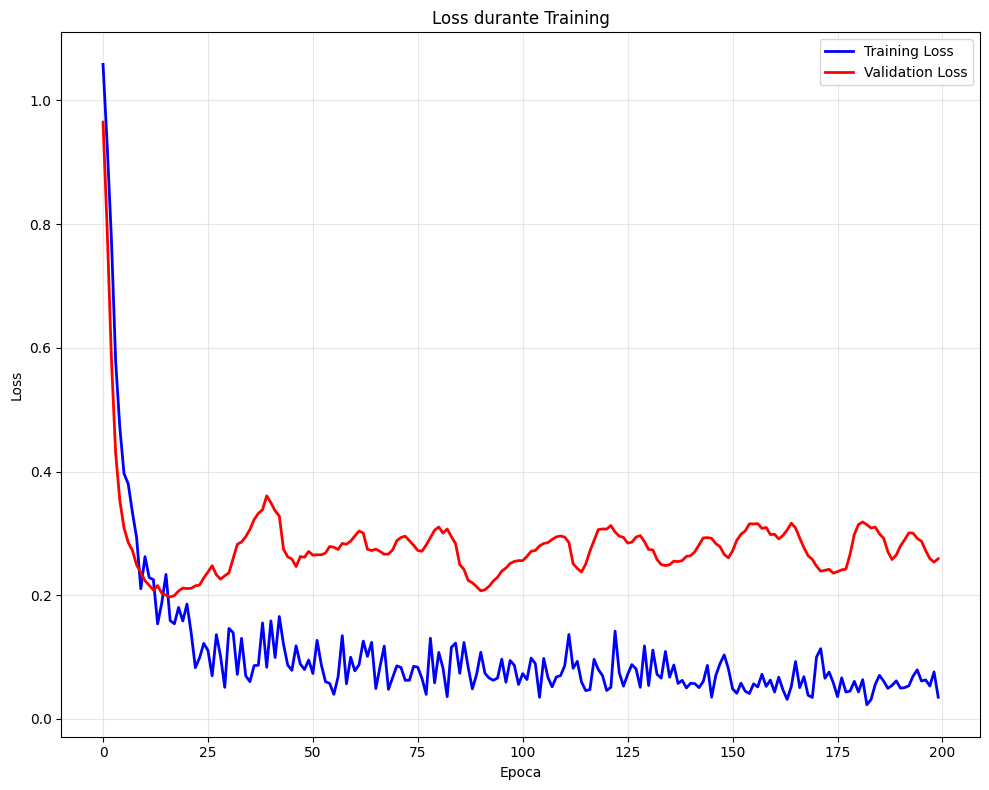

In [16]:
# Visualizza l'andamento del training
fig, ax = plt.subplots(figsize=(10, 8))

# Loss
ax.plot(train_losses, 'b-', label='Training Loss', linewidth=2)
ax.plot(val_losses, 'r-', label='Validation Loss', linewidth=2)
ax.set_title('Loss durante Training')
ax.set_xlabel('Epoca')
ax.set_ylabel('Loss')
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 8. Valutazione Finale su Test Set 🎯

Ora valutiamo le performance del nostro modello sul test set (dati mai visti durante il training).

In [17]:
# Valutazione sul test set
from sklearn.metrics import f1_score

model.eval()
test_predictions = []
test_true = []

with torch.no_grad():
    outputs = model(X_test_tensor)
    _, predicted = torch.max(outputs, 1)
    test_predictions = predicted.numpy()
    test_true = y_test

# Calcola le metriche finali
test_accuracy = accuracy_score(test_true, test_predictions)
test_f1 = f1_score(test_true, test_predictions, average='weighted')

print("PERFORMANCE FINALI SUL TEST SET:")
print(f"Accuracy: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")
print(f"F1-Score: {test_f1:.4f}")
print()

# Report di classificazione dettagliato
print("CLASSIFICATION REPORT:")
print(classification_report(test_true, test_predictions, 
                          target_names=iris.target_names))

PERFORMANCE FINALI SUL TEST SET:
Accuracy: 0.9333 (93.33%)
F1-Score: 0.9327

CLASSIFICATION REPORT:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.80      0.89        10
   virginica       0.83      1.00      0.91        10

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30



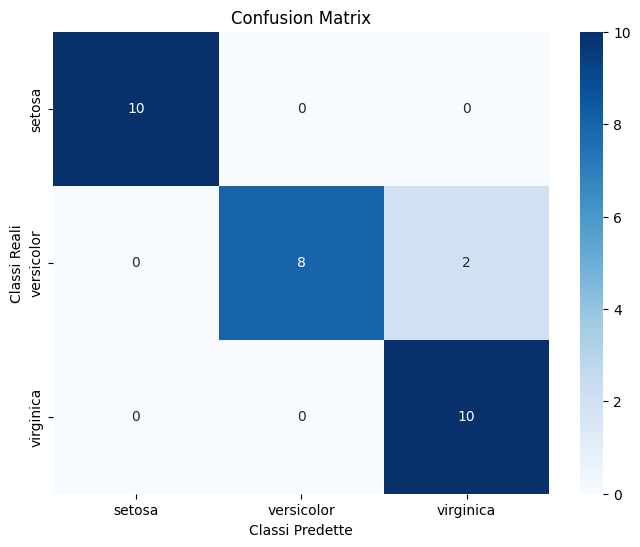

ANALISI DEGLI ERRORI:
Errore: Vero=versicolor, Predetto=virginica
Errore: Vero=versicolor, Predetto=virginica


In [18]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(test_true, test_predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=iris.target_names, 
            yticklabels=iris.target_names)
plt.title('Confusion Matrix')
plt.ylabel('Classi Reali')
plt.xlabel('Classi Predette')
plt.show()

# Analisi degli errori
print("ANALISI DEGLI ERRORI:")
for i in range(len(test_true)):
    if test_true[i] != test_predictions[i]:
        print(f"Errore: Vero={iris.target_names[test_true[i]]}, "
              f"Predetto={iris.target_names[test_predictions[i]]}")